In [2]:
import numpy as np
import pandas as pd
import pylab as pl
import os
import json
import geopandas as gp
import urllib2
import statsmodels.api as sm1
import statsmodels.formula.api as sm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv("CSA.csv")

In [4]:
df.head()

,FID,csacode,csatitle,County_Total,ALAND,POP2000,Normalized,Land_Area,POP_Density,Log_Density,Log_Land_Area
0,112,408,"New York-Newark, NY-NJ-CT-PA",65304422,35882895971,22240879,2.93623,13854.463610,1605.322273,3.205562,4.141590
1,120,428,"Philadelphia-Reading-Camden, PA-NJ-DE-MD",21493872,18999164331,6688798,3.21341,7335.618367,911.824698,2.959911,3.865437
2,22,176,"Chicago-Naperville, IL-IN-WI",50718455,27547049560,9465353,5.35833,10635.975310,889.937474,2.949359,4.026777
3,38,220,"Detroit-Warren-Ann Arbor, MI",28699423,16913389521,5456428,5.25975,6530.296210,835.555972,2.921976,3.814933
4,12,148,"Boston-Worcester-Providence, MA-RI-NH-CT",29030745,25128606215,7630016,3.80481,9702.209112,786.420485,2.895655,3.986871


In [5]:
df.describe()

,FID,csacode,County_Total,ALAND,POP2000,Normalized,Land_Area,POP_Density,Log_Density,Log_Land_Area
count,166.000000,166.000000,166.000000,1.660000e+02,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,82.500000,336.746988,6113318.463855,1.360017e+10,1281683.481928,7.289837,5251.067797,203.382359,2.148177,3.580395
std,48.064193,127.586106,9279746.811387,1.402691e+10,2585148.035245,10.704538,5415.895938,204.072625,0.388037,0.333020
min,0.000000,104.000000,150999.000000,1.597387e+09,32874.000000,1.772300,616.754521,4.626677,0.665269,2.790112
25%,41.250000,232.250000,1233122.500000,5.775350e+09,213600.500000,3.417930,2229.874916,86.686425,1.937922,3.348280
50%,82.500000,338.500000,2614123.500000,8.657534e+09,488018.500000,4.388860,3342.692718,142.663049,2.154311,3.524096
75%,123.750000,443.000000,6701975.250000,1.604439e+10,1205642.000000,6.927693,6194.771985,243.228850,2.386001,3.792019
max,165.000000,566.000000,65304422.000000,1.020000e+11,22240879.000000,118.766998,39384.437030,1605.322273,3.205562,4.595325


In [5]:
import statsmodels.formula.api as smf

In [6]:
model1 = smf.ols('Normalized ~ 1+I(Log_Density)', data=df).fit()
print model1.summary()

                            OLS Regression Results                            
Dep. Variable:             Normalized   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     20.97
Date:                Sun, 22 Nov 2015   Prob (F-statistic):           9.17e-06
Time:                        20:05:09   Log-Likelihood:                -618.58
No. Observations:                 166   AIC:                             1241.
Df Residuals:                     164   BIC:                             1247.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         27.2443      4.427      6.

In [7]:
model2 = smf.ols('Normalized ~ 1+Log_Density+I(Log_Density**2.0)', data=df).fit()
print model2.summary()

                            OLS Regression Results                            
Dep. Variable:             Normalized   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     27.17
Date:                Sun, 22 Nov 2015   Prob (F-statistic):           6.56e-11
Time:                        20:05:15   Log-Likelihood:                -604.69
No. Observations:                 166   AIC:                             1215.
Df Residuals:                     163   BIC:                             1225.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                91.27

In [9]:
#pl.plot(x, model1.predict(x), lw = 5, label="quadratic fit")
#pl.plot(q, r, 'k.', markersize=10)

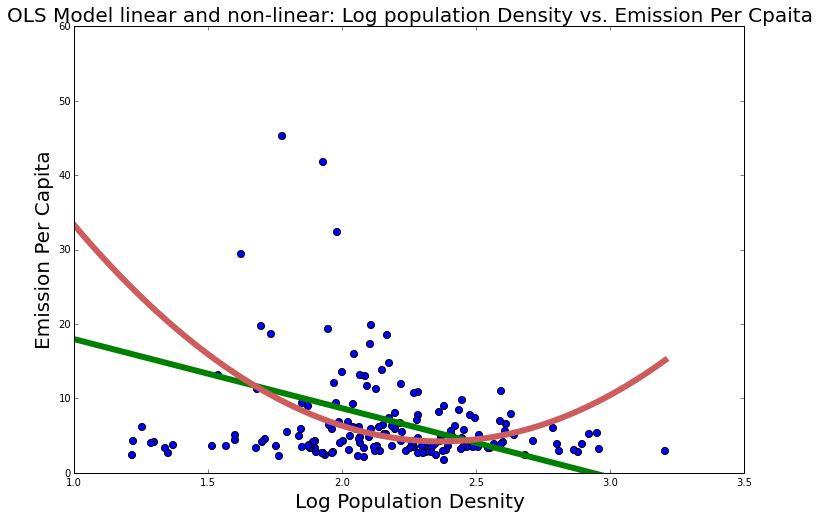

In [12]:
df.plot(kind='scatter', x='Log_Density', y="Normalized", figsize=(12,8), s=50)
x= pd.DataFrame({'Log_Density': np.linspace(df.Log_Density.min()-1, df.Log_Density.max(), 100)})
plt.xlim(1, 3.5)
plt.ylim(0, 60)
plt.plot(x, model1.predict(x), 'Green', linewidth = 6)
plt.plot(x, model2.predict(x),'IndianRed', linewidth = 6)
pl.xlabel("Log Population Desnity", fontsize=20)
pl.ylabel("Emission Per Capita", fontsize=20)
plt.title('OLS Model linear and non-linear: Log population Density vs. Emission Per Cpaita',fontsize=20)
plt.legend(fontsize=30, loc=2)